In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [80]:
df = sns.load_dataset('titanic')

In [81]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [82]:
df.isnull().head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [83]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [84]:
df[df.deck.isnull()].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


In [85]:
df = df.drop(labels='deck', axis=1)

In [86]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [87]:
mean_female_age = round(df[df.sex=='female'].age.mean())

In [88]:
mean_male_age = round(df[df.sex=='male'].age.mean())

In [89]:
df[(df.sex == 'female') & (df.age.isnull())].shape

(53, 14)

In [90]:
df[(df.sex == 'male') & (df.age.isnull())].shape

(124, 14)

In [91]:
for i in range(len(df)):
  if df.sex[i] == 'female' and pd.isnull(df.age[i]):
    df.loc[i, 'age'] = mean_female_age
  elif df.sex[i] == 'male' and pd.isnull(df.age[i]):
    df.loc[i, 'age'] = mean_male_age

In [92]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [93]:
embarked_mode = df.embarked.mode()
embark_town_mode = df.embark_town.mode()
print(embark_town_mode)
print(embarked_mode)


0    Southampton
Name: embark_town, dtype: object
0    S
Name: embarked, dtype: object


In [94]:
df.fillna({'embarked': 'S', 'embark_town': 'Southampton'}, inplace=True)

In [95]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [96]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [97]:
df['fare'] = np.log1p(df['fare'])
df['Family_size'] = df.sibsp + df.parch

In [98]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,Family_size
0,0,3,male,22.0,1,0,2.110213,S,Third,man,True,Southampton,no,False,1
1,1,1,female,38.0,1,0,4.280593,C,First,woman,False,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,2.188856,S,Third,woman,False,Southampton,yes,True,0


In [99]:
df.Family_size.unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10])

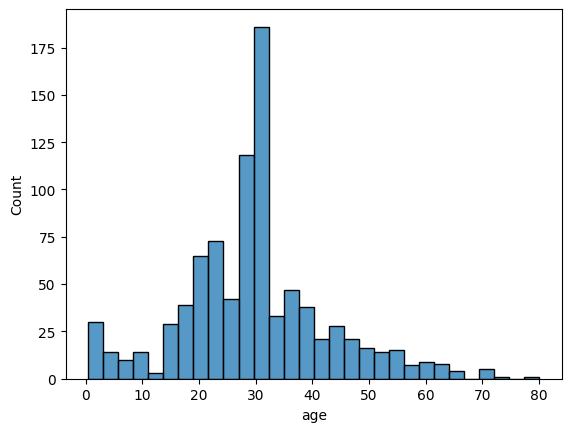

In [100]:
# Plot histogram of age distribution
sns.histplot(data=df, x='age', bins=30)

plt.show()

In [101]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df['age'] = sc.fit_transform(df[['age']])
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,Family_size
0,0,3,male,-0.597926,1,0,2.110213,S,Third,man,True,Southampton,no,False,1
1,1,1,female,0.631885,1,0,4.280593,C,First,woman,False,Cherbourg,yes,False,1


In [102]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
Family_size    0
dtype: int64

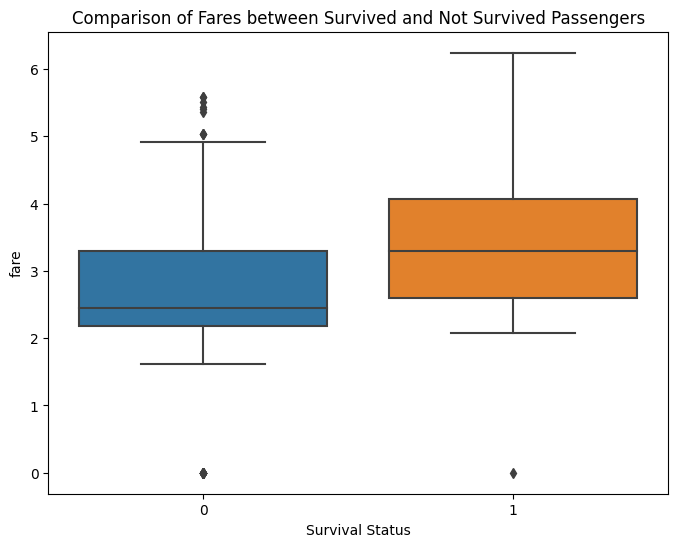

In [103]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='survived', y='fare', data=df)
plt.xlabel('Survival Status')
plt.title('Comparison of Fares between Survived and Not Survived Passengers')
plt.show()



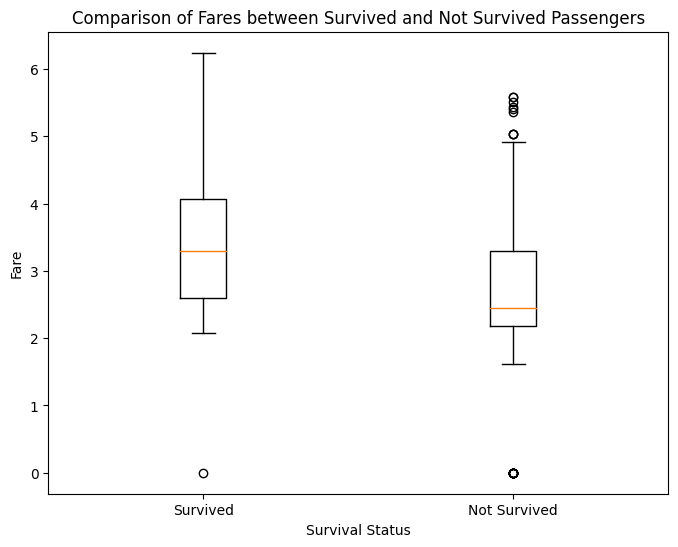

In [104]:
#  Using plt
survived_data = df[df['survived'] == 1]['fare']
not_survived_data = df[df['survived'] == 0]['fare']

plt.figure(figsize=(8, 6))
plt.boxplot([survived_data, not_survived_data], labels=['Survived', 'Not Survived'])
plt.xlabel('Survival Status')
plt.ylabel('Fare')
plt.title('Comparison of Fares between Survived and Not Survived Passengers')  # Set the title of the plot
plt.show()

<ipython-input-105-c02f7073dc0c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


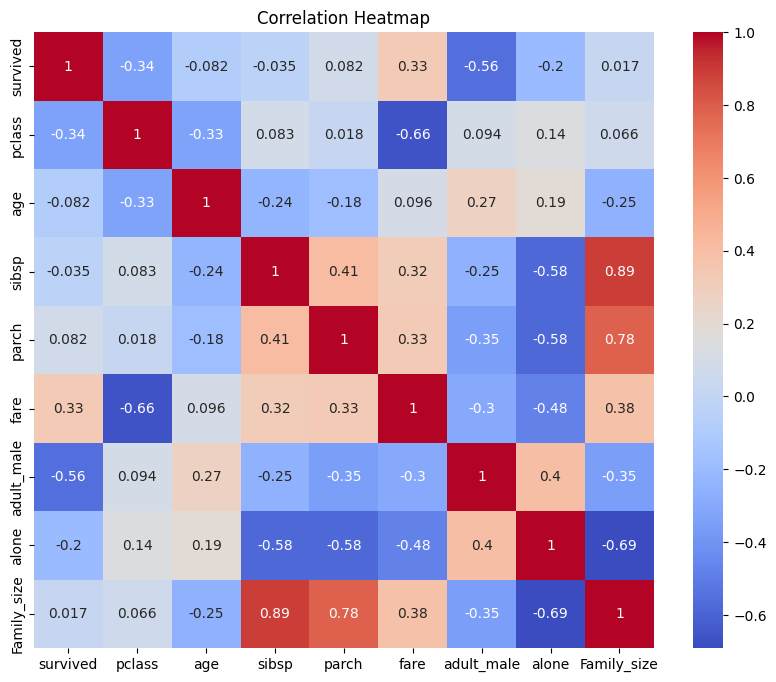

In [105]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [106]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,Family_size
0,0,3,male,-0.597926,1,0,2.110213,S,Third,man,True,Southampton,no,False,1
1,1,1,female,0.631885,1,0,4.280593,C,First,woman,False,Cherbourg,yes,False,1
2,1,3,female,-0.290473,0,0,2.188856,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.401296,1,0,3.990834,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.401296,0,0,2.202765,S,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,-0.213610,0,0,2.639057,S,Second,man,True,Southampton,no,True,0
887,1,1,female,-0.828515,0,0,3.433987,S,First,woman,False,Southampton,yes,True,0
888,0,3,female,-0.136747,1,2,3.196630,S,Third,woman,False,Southampton,no,False,3
889,1,1,male,-0.290473,0,0,3.433987,C,First,man,True,Cherbourg,yes,True,0


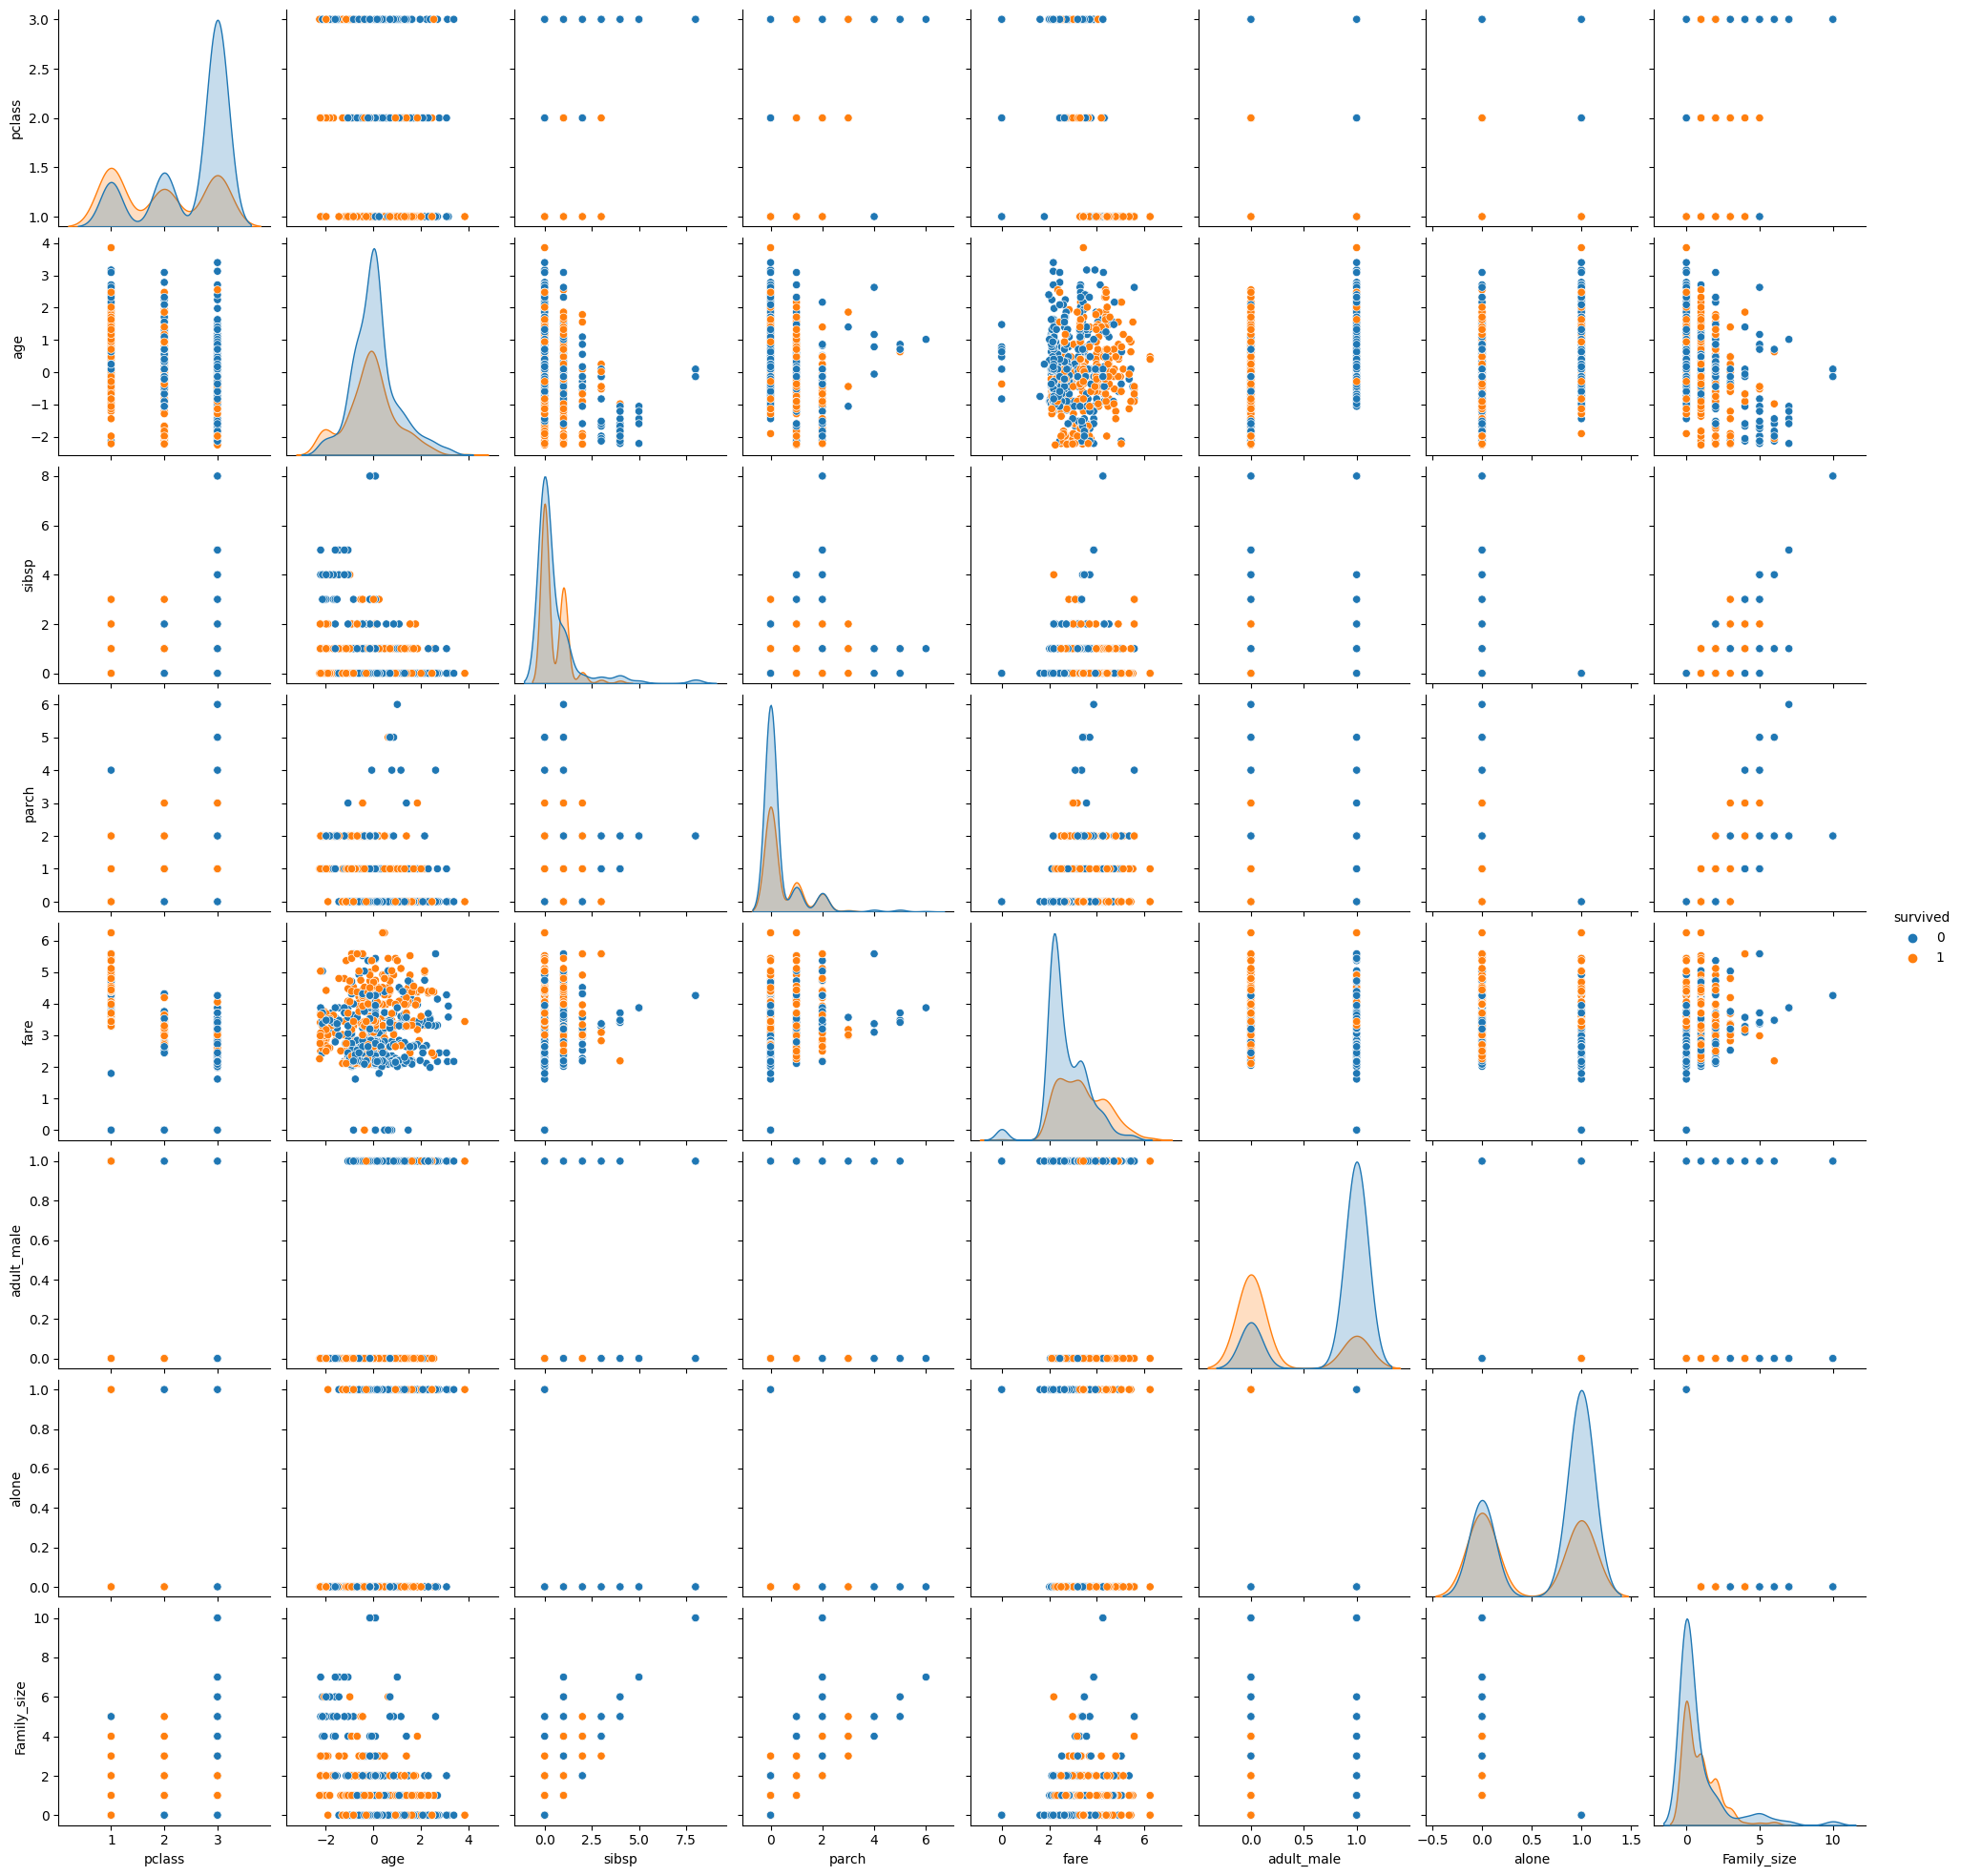

In [109]:
# Assuming you have loaded the Titanic dataset into a DataFrame called 'df'
# df = sns.load_dataset('titanic')

# Plot the pairwise relationship between different classes of 'survived'
sns.pairplot(df, hue='survived')

# Show the plot
plt.show()

In [108]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'Family_size'],
      dtype='object')